In [9]:
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression
import pandas as pd
import seaborn as sns

In [ ]:
df = pd.read_csv('C:\\Users\\Desktop\\Data analysis\\Sql\\amazon.csv')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   object
dtypes: obj

In [13]:
df['discounted_price'] = df['discounted_price'].replace('[₹,]', '', regex=True).astype(float)
df['actual_price'] = df['actual_price'].replace('[₹,]', '', regex=True).astype(float)
df['rating_count'] = df['rating_count'].replace(',', '', regex=True).astype(float)

df.isnull().sum()

product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           2
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64

In [14]:
df['estimated_revenue'] = df['discounted_price'] * df['rating_count']

total_revenue = df['estimated_revenue'].sum()

print("Estimated Total Revenue:", total_revenue)


Estimated Total Revenue: 71919778633.27


In [15]:
most_purchased = df.sort_values(by='rating_count', ascending=False)[
    ['product_name', 'rating_count']
].head(1)

most_purchased

,product_name,rating_count
12,AmazonBasics Flexible Premium HDMI Cable (Blac...,426973.0


In [16]:
top_10_revenue = df.sort_values(by='estimated_revenue', ascending=False)[
    ['product_name', 'estimated_revenue']
].head(10)

top_10_revenue

,product_name,estimated_revenue
370,"Redmi 9 Activ (Carbon Black, 4GB RAM, 64GB Sto...",2.667292e+09
566,"Redmi 9A Sport (Coral Green, 3GB RAM, 32GB Sto...",2.353426e+09
371,"Redmi 9A Sport (Coral Green, 2GB RAM, 32GB Sto...",2.039620e+09
473,"Redmi 9A Sport (Carbon Black, 2GB RAM, 32GB St...",2.039594e+09
124,Redmi 126 cm (50 inches) 4K Ultra HD Android S...,1.492809e+09
72,Redmi 108 cm (43 inches) 4K Ultra HD Android S...,1.221381e+09
568,"Samsung Galaxy S20 FE 5G (Cloud Navy, 8GB RAM,...",1.055742e+09
332,MI 138.8 cm (55 inches) 5X Series 4K Ultra HD ...,9.988227e+08
91,OnePlus 108 cm (43 inches) Y Series Full HD Sm...,8.724401e+08
197,MI 108 cm (43 inches) 5A Series Full HD Smart ...,8.209672e+08


In [17]:
top_rated = df.sort_values(by='rating', ascending=False)[
    ['product_name', 'rating']
].head(10)

top_rated

,product_name,rating
1279,Eureka Forbes car Vac 100 Watts Powerful Sucti...,|
324,"REDTECH USB-C to Lightning Cable 3.3FT, [Apple...",5.0
174,Syncwire LTG to USB Cable for Fast Charging Co...,5.0
775,Amazon Basics Wireless Mouse | 2.4 GHz Connect...,5.0
1201,"Oratech Coffee Frother electric, milk frother ...",4.8
1145,Swiffer Instant Electric Water Heater Faucet T...,4.8
1299,"Instant Pot Air Fryer, Vortex 2QT, Touch Contr...",4.8
1223,"FIGMENT Handheld Milk Frother Rechargeable, 3-...",4.7
1388,Campfire Spring Chef Prolix Instant Portable W...,4.7
1275,Multifunctional 2 in 1 Electric Egg Boiling St...,4.7


In [18]:
high_discount = df.sort_values(by='discount_percentage', ascending=False)[
    ['product_name', 'discount_percentage']
].head(10)

high_discount

,product_name,discount_percentage
695,"rts [2 Pack] Mini USB C Type C Adapter Plug, T...",94%
364,"Fire-Boltt Ninja Call Pro Plus 1.83"" Smart Wat...",91%
380,"Fire-Boltt Ninja Call Pro Plus 1.83"" Smart Wat...",91%
368,"Fire-Boltt Ninja Call Pro Plus 1.83"" Smart Wat...",91%
334,"Fire-Boltt Ninja Call Pro Plus 1.83"" Smart Wat...",91%
372,"Fire-Boltt Ninja Call Pro Plus 1.83"" Smart Wat...",91%
557,LAPSTER 12pcs Spiral Cable Protectors for Char...,90%
1026,beatXP Kitchen Scale Multipurpose Portable Ele...,90%
920,"Silicone Rubber Earbuds Tips, Eartips, Earpads...",90%
644,Sounce Spiral Charger Cable Protector Data Cab...,90%


In [19]:
df['loss_per_product'] = (df['actual_price'] - df['discounted_price']) * df['rating_count']

total_loss = df['loss_per_product'].sum()

print("Estimated Total Discount Loss:", total_loss)

Estimated Total Discount Loss: 49407430021.310005


In [20]:
category_revenue = df.groupby('category')['estimated_revenue'].sum().sort_values(ascending=False)

category_revenue.head(10)

category
Electronics|Mobiles&Accessories|Smartphones&BasicMobiles|Smartphones                 2.935870e+10
Electronics|HomeTheater,TV&Video|Televisions|SmartTelevisions                        1.740790e+10
Electronics|WearableTechnology|SmartWatches                                          3.581338e+09
Electronics|Headphones,Earbuds&Accessories|Headphones|In-Ear                         3.072251e+09
Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables    1.171594e+09
Computers&Accessories|ExternalDevices&DataStorage|ExternalHardDisks                  1.028957e+09
Electronics|Mobiles&Accessories|MobileAccessories|Chargers|PowerBanks                1.000373e+09
Electronics|Accessories|MemoryCards|MicroSD                                          9.790756e+08
Home&Kitchen|Kitchen&HomeAppliances|SmallKitchenAppliances|MixerGrinders             9.230096e+08
Electronics|Mobiles&Accessories|Smartphones&BasicMobiles|BasicMobiles                7.451520e+08
Name: estim

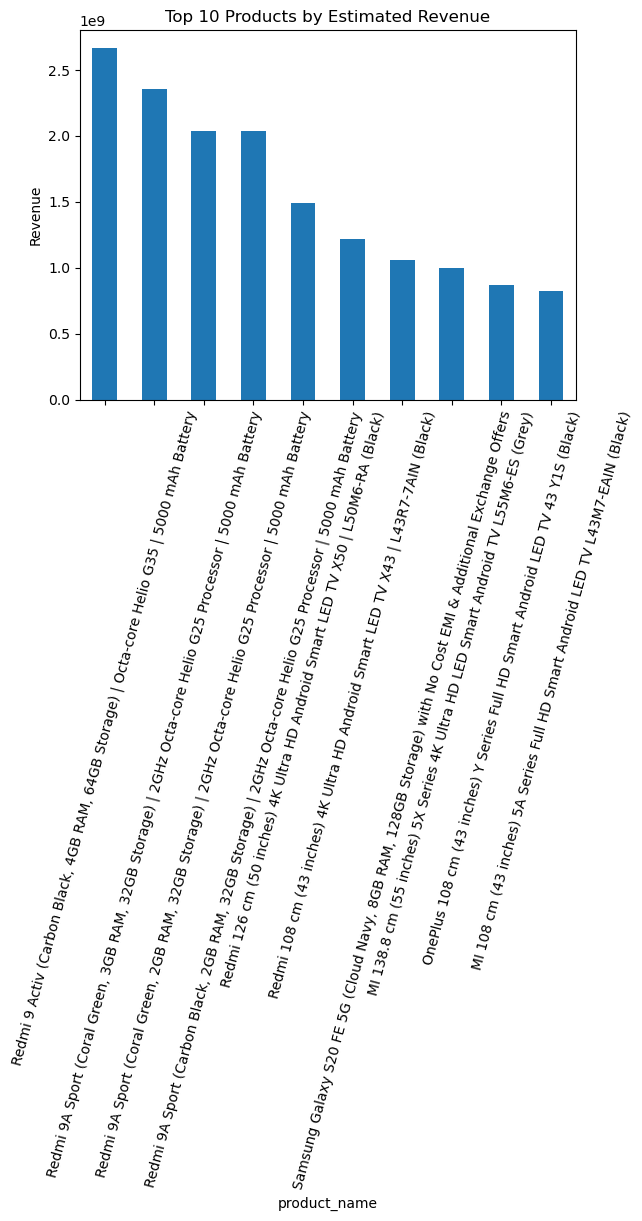

In [21]:
import matplotlib.pyplot as plt

top_10_revenue.set_index('product_name')['estimated_revenue'].plot(kind='bar')
plt.title("Top 10 Products by Estimated Revenue")
plt.ylabel("Revenue")
plt.xticks(rotation=75)
plt.show()